decay done, took: 1.4627184867858887 seconds
axion done, took: 0.19430232048034668 seconds


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:107: RuntimeWarning: divide by zero encountered in true_divide
  rho0 * (decay_const * rho_phi_prime - 4*H*rho_R_prime) / (np.pi**2/30*g_star * 4 * T**3))
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  rho0 * (decay_const * rho_phi_prime - 4*H*rho_R_prime) / (np.pi**2/30*g_star * 4 * T**3))
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:94: RuntimeWarning: overflow encountered in power
  rho_phi_prime = a**(-3) * x
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:94: RuntimeWarning: invalid value encountered in multiply
  rho_phi_prime = a**(-3) * x
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:95: RuntimeWarning: overflow encountered in power
  rho_R_prime = a**(-4) * (y - x)


trans done, took: 1.0929477214813232 seconds
T(0) = 59757423139.74192
a(0) = 1.0
axion decay done, took: 1.287050724029541 seconds


<Figure size 432x288 with 0 Axes>

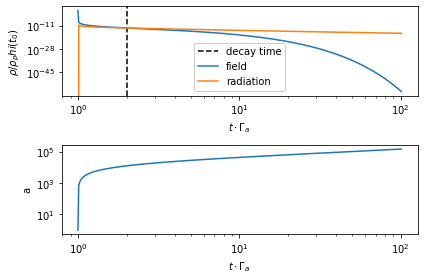

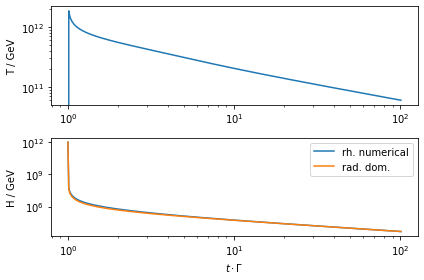

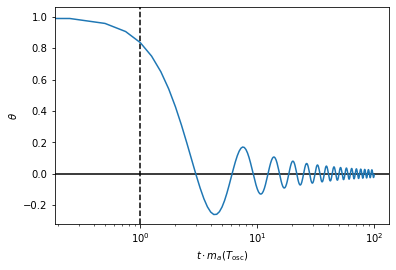

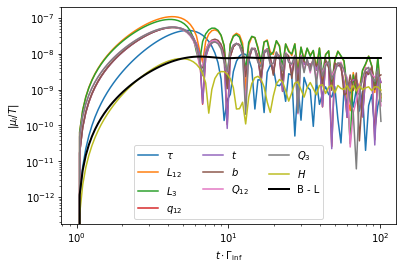

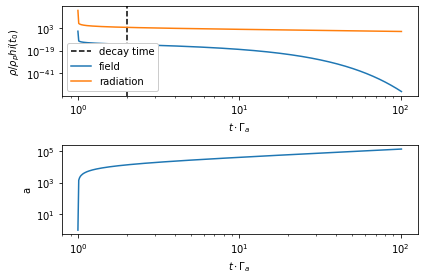

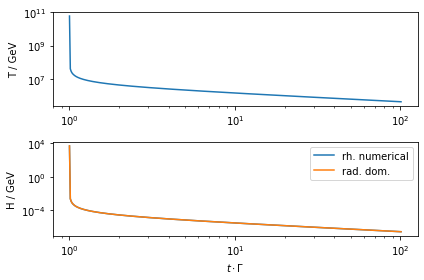

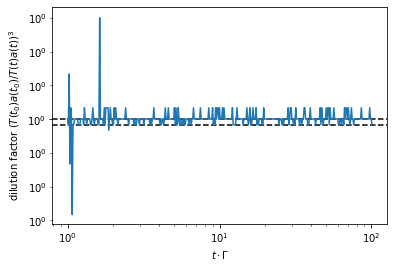

In [35]:
%run test.py
test(1e12, 1e6, 1e6, 1e8, tmax_axion_time=100.0, axion_decay_time=100.0, debug=True)

step = 1


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:112: RuntimeWarning: divide by zero encountered in true_divide
  plt.figure()
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:112: RuntimeWarning: divide by zero encountered in double_scalars
  plt.figure()
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:97: RuntimeWarning: overflow encountered in exp
  H = H_const * np.sqrt(rho_R_prime + rho_phi_prime)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:100: RuntimeWarning: invalid value encountered in multiply
  def T_and_H_fn(t_prime):
/home/jana/Documents/masters-project/transport_eq_in_time/test.py:90: RuntimeWarning: invalid value encountered in log
  log_ts_inf = np.linspace(np.log(decay_process.t0 + tmax_inf_time - conv_factor * step_tmax_axion_time),


delta = nan convergence_rtol = 1e-06
step = 2
delta = -0.6006464507794671 convergence_rtol = 1e-06


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:99: RuntimeWarning: overflow encountered in power
  
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:99: RuntimeWarning: invalid value encountered in multiply
  
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:100: RuntimeWarning: overflow encountered in power
  def T_and_H_fn(t_prime):
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:100: RuntimeWarning: invalid value encountered in multiply
  def T_and_H_fn(t_prime):


NameError: name 'axion_decay_time' is not defined

<Figure size 432x288 with 0 Axes>

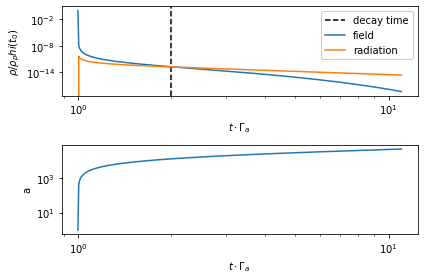

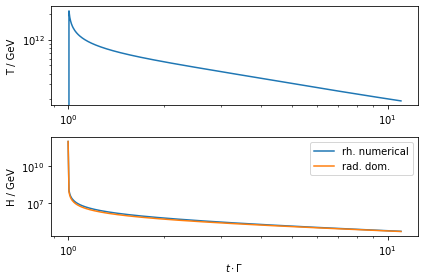

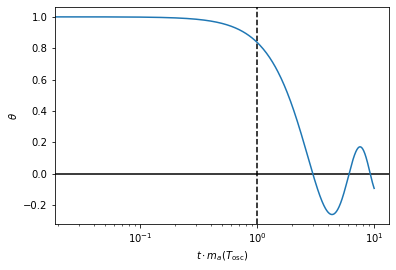

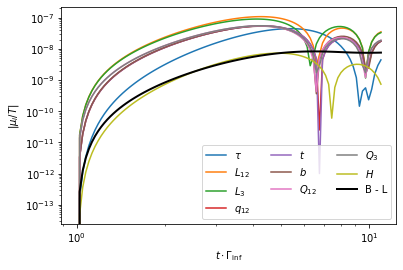

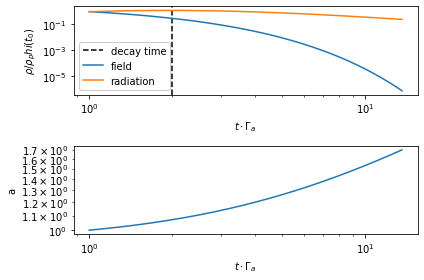

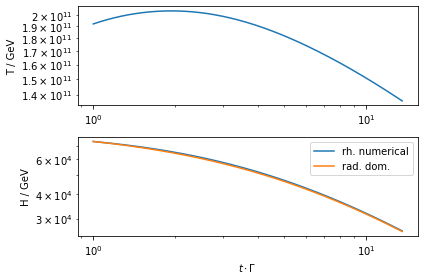

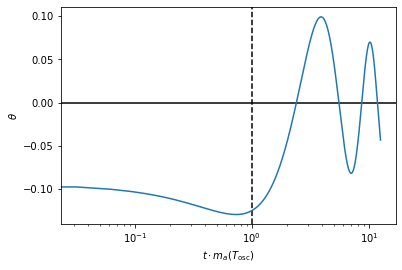

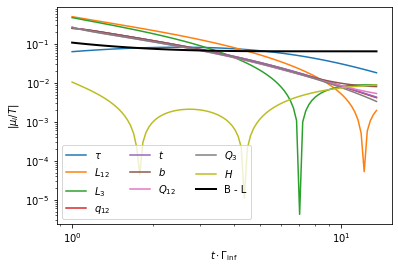

In [41]:
%run test.py
compute_asymmetry(1e12, 1e6, 1e6, 1e8, debug=True)